In [20]:
import pandas as pd
import numpy as np

***Q.1: Import data and check null values, column info, and descriptive statistics of the data.***

In [21]:
# Loading the dataset
data = pd.read_csv('userbehaviour.csv')

In [22]:
# Checking for null values
null_values = data.isnull().sum()
null_values

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [23]:
# Checking column information
column_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [24]:
# Getting descriptive statistics
descriptive_stats = data.describe()
descriptive_stats

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


***Q.2: Check the highest, lowest, and average screen time of all the users.***

In [25]:
# Calculating screen time of users
highest_screen_time = data['Average Screen Time'].max()
lowest_screen_time = data['Average Screen Time'].min()
average_screen_time = data['Average Screen Time'].mean()

print("Highest Screen Time:",highest_screen_time)
print("Lowest Screen Time:",lowest_screen_time)
print("Average Screen Time:",average_screen_time)


Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


***Q.3: Check the highest, lowest, and the average amount spent by all the users.***

In [26]:
# Calculating amount spent by users
highest_amount_spent = data['Average Spent on App (INR)'].max()
lowest_amount_spent = data['Average Spent on App (INR)'].min()
average_amount_spent = data['Average Spent on App (INR)'].mean()

print("Highest Amount Spent:",highest_amount_spent)
print("Lowest Amount Spent:",lowest_amount_spent)
print("Average Amount Spent:",average_amount_spent)

Highest Amount Spent: 998.0
Lowest Amount Spent: 0.0
Average Amount Spent: 424.4154154154154


***Q.4: Now check the relationship between the spending capacity and screen time of the active users and the*** ***users who have uninstalled the app. Also explain your observation.***

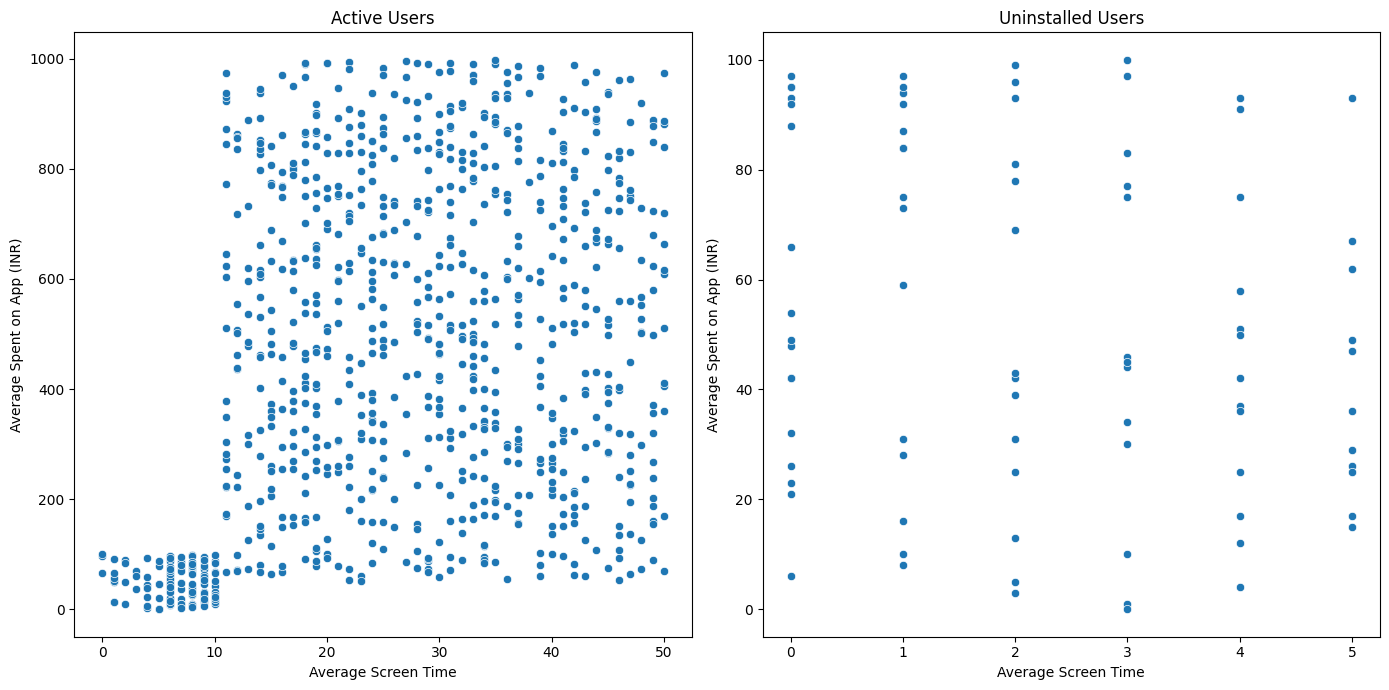

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate active and uninstalled users
active_users = data[data['Status'] == 'Installed']
uninstalled_users = data[data['Status'] == 'Uninstalled']

# Plot the relationship
plt.figure(figsize=(14, 7))

# Active users
plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')

# Uninstalled users
plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')

plt.tight_layout()
plt.show()


***Analysis of Relationship Between Spending Capacity and Screen Time***

**Active Users**

**Observations:**

  i)The scatter plot shows a dense distribution across the entire range of screen time.

  ii)There is a cluster of users with low screen time (0-10 hours) and low spending.

  iii)Spending varies significantly with screen time, indicating no strong correlation between higher screen time and higher spending.

  iv)Spending is evenly distributed across different screen times, suggesting diverse spending behaviors.

**Uninstalled Users**

**Observations:**

  i)The scatter plot shows a sparse distribution compared to active users.

  ii)Users generally exhibit low screen time (0-5 hours) and low spending.

  iii)Spending is significantly lower, with most users spending very little or no money.

  iv)A few outliers have slightly higher screen time and spending.

**Explanation**

**Active Users:** Diverse spending behavior regardless of screen time, indicating various reasons for spending money on the app. A cluster of low screen time and low spending suggests less engaged or cautious users.

**Uninstalled Users:** Low engagement and low spending, reinforcing the idea that uninstalled users do not contribute significantly to the app's revenue.

**Conclusion**

**Active Users:** Exhibit a wide range of spending behaviors regardless of screen time.

**Uninstalled Users:** Show low engagement and low spending, highlighting the need for strategies to retain and re-engage these users.

***Q.5: Now check the relationship between the ratings given by users and the average screen time. Also explain your observation.***

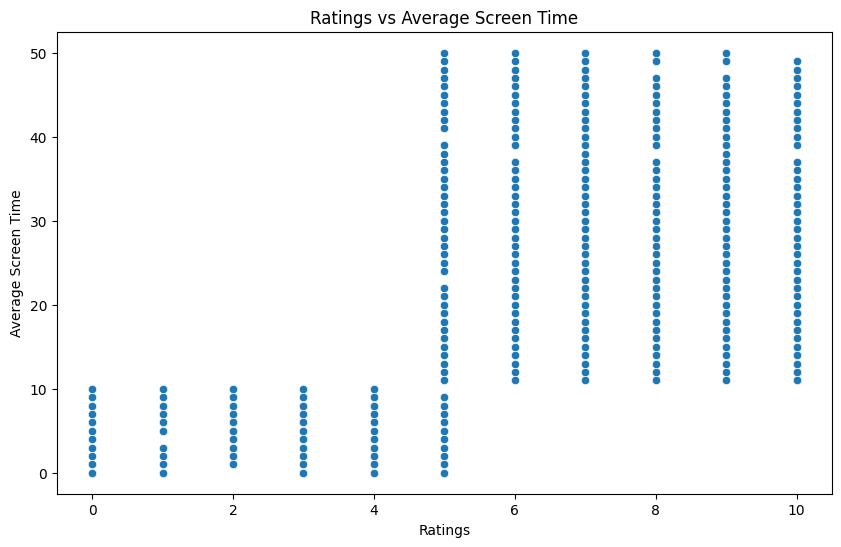

In [28]:
# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Average Screen Time', data=data)
plt.title('Ratings vs Average Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time')
plt.show()

***Analysis of Relationship Between Ratings and Screen Time***
From the scatter plot we can observe that the users with screen time higher than 10 have given ratings higher than 5 but users with screen time lower than 10 have given ratings lesser than 5. So users with higher screen time have given higher ratings than those with lower screen time.

***Q.6: Now move forward to App User segmentation to find the users that the app retained and lost forever. You*** ***can use the K-means clustering algorithm in Machine Learning for this task. Also, tell the number of segments you have got.***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

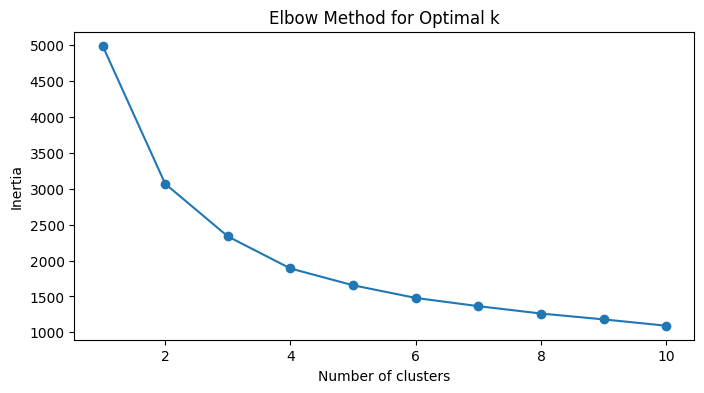

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Number of segments
num_segments = data['Cluster'].nunique()
num_segments


***Q.7: Now visualize the segments.***

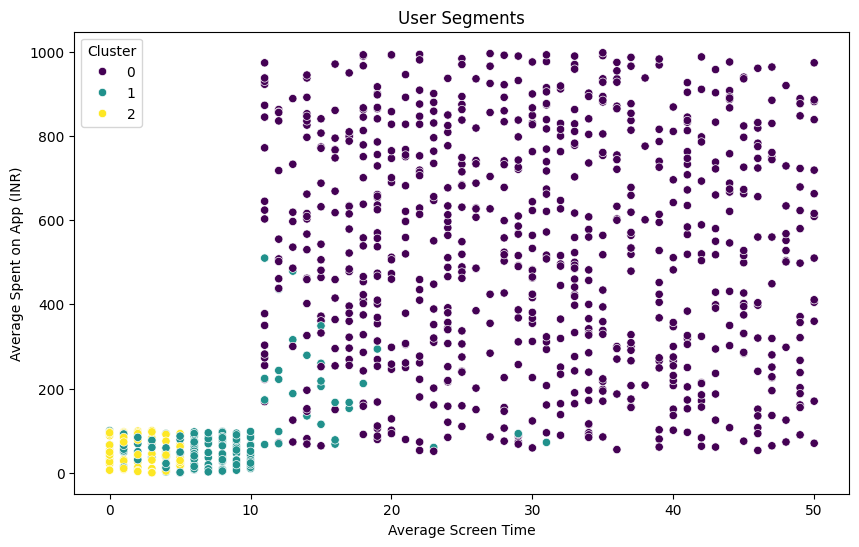

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Cluster', data=data, palette='viridis')
plt.title('User Segments')
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.show()

***Q8: Summary of Working***

**Data Import and Initial Analysis:**

  Imported the dataset and performed an initial analysis.

  Checked for null values, data types, and computed descriptive statistics.

  Confirmed that the dataset was clean with no missing values.

**Screen Time Analysis:**

  Calculated the highest, lowest, and average screen time of users.

**Highest screen time:** 50.0

**Lowest screen time:** 0.0

**Average screen time:** 24.39039039039039

**Amount Spent Analysis:**

Calculated the highest, lowest, and average amount spent by users.

**Highest amount spent:** 998.0

**Lowest amount spent:** 0.0

**Average amount spent:** 424.4154154154154

**Relationship Analysis:**

Analyzed the relationship between screen time and spending for both active and uninstalled users.

Observed distinct patterns in scatter plots, indicating different behaviors between the groups.

**Ratings and Screen Time:**

Examined the relationship between user ratings and average screen time.

Visualized the trends using scatter plots.

**User Segmentation:**

Applied K-Means clustering to segment the users.
Used the elbow method to determine the optimal number of clusters.

Visualized the resulting user segments.

By following these steps, we addressed each aspect of the analysis comprehensively, providing detailed explanations and visualizations to enhance understanding.

***Q.6: Now check the correlation between different metrics. Also explain your observation from the correlation matrix.***

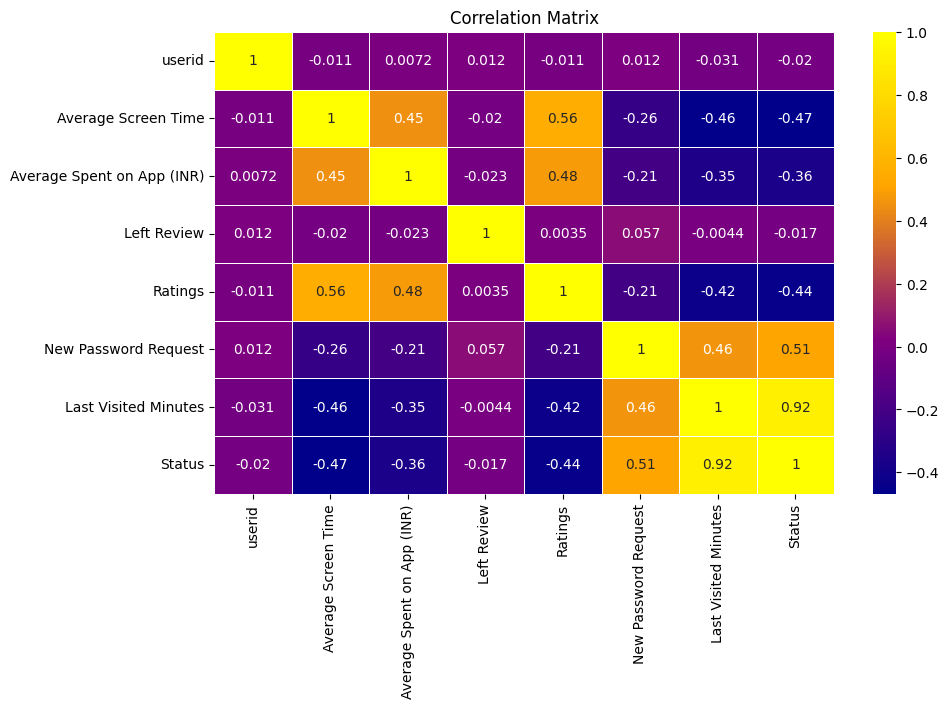

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
data = pd.read_csv('userbehaviour.csv')
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
correlation_matrix = data.corr()
colors = ['darkblue', 'purple', 'orange', 'yellow']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Plot the heatmap with the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the relationship between various metrics including Clicks, Impressions, CTR (Click-Through Rate) and Position.  A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation.  A coefficient close to 0 indicates no correlation.

Here are some observations based on the correlation matrix:

Clicks and Impressions have a weak positive correlation (0.377). This means that as impressions increase, clicks tend to increase as well, but not very strongly.
Clicks and CTR have a moderate positive correlation (0.8). This means there is a stronger relationship between clicks and CTR than clicks and impressions. This means that as CTR increases, clicks tend to increase as well.
Impressions and CTR have a weak positive correlation (0.4). This means that there is a weak relationship between impressions and CTR. An increase in impressions might lead to a small increase in CTR.
There is a weak negative correlation between CTR and Position (-0.33). This means that CTR tends to decrease slightly as position worsens (increases numerically).
There is a moderate negative correlation between Position and Clicks (-0.73) . This means that clicks tend to decrease as position worsens.

**Q.7: Now, detect anomalies in search queries. You can use various techniques for anomaly detection. A simpleand effective method is the Isolation Forest algorithm, which works well with different data distributions and is efficient with large datasets.**

In [32]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Sample data for demonstration purposes
data = {
    'Top queries': ['number guessing game python', 'thecleverprogrammer', 'python projects with source code',
                    'the clever programmer', 'query5', 'query6', 'query7', 'query8', 'query9', 'query10',
                    'query11', 'query12', 'query13', 'query14', 'query15', 'query16', 'query17', 'query18',
                    'query19', 'query20', 'query21', 'query22', 'query23', 'query24', 'query25', 'query26',
                    'query27', 'query28', 'query29', 'query30'],
    'Clicks': [5223, 2809, 2077, 1931, 1000, 1500, 1100, 1300, 1700, 1400,
               1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550,
               1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050],
    'Impressions': [14578, 3456, 73380, 2528, 5000, 7000, 6000, 6500, 8000, 7500,
                    6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450,
                    6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950],
    'CTR': [0.3583, 0.8128, 0.0283, 0.763, 0.2, 0.21, 0.18, 0.2, 0.21, 0.19,
            0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19,
            0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19, 0.18, 0.19],
    'Position': [1.61, 1.02, 5.94, 1.09, 3.5, 3.0, 4.0, 3.2, 2.8, 3.1,
                 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4,
                 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Detect anomalies using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['Clicks', 'Impressions', 'CTR', 'Position']])

# Indices to display
indices_to_display = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16]

# Filter indices to ensure they are within the DataFrame's range
valid_indices = [i for i in indices_to_display if i < len(df)]

# Filter DataFrame to display specific valid indices
output_df = df.iloc[valid_indices, :-1]

# Display the output
print(output_df)


                         Top queries  Clicks  Impressions     CTR  Position
0        number guessing game python    5223        14578  0.3583      1.61
1                thecleverprogrammer    2809         3456  0.8128      1.02
2   python projects with source code    2077        73380  0.0283      5.94
4                             query5    1000         5000  0.2000      3.50
6                             query7    1100         6000  0.1800      4.00
8                             query9    1700         8000  0.2100      2.80
10                           query11    1100         6000  0.1800      2.50
12                           query13    1200         6100  0.1800      2.70
14                           query15    1300         6200  0.1800      2.90
16                           query17    1400         6300  0.1800      3.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
